In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\AI\Data Analysis\heart disease project\2022\heart_2022_with_nans.csv')
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
data.duplicated().sum()

9

In [6]:
missing_values=data.isnull().sum() #checking for missing values
missing_values

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [7]:
missing_precentage=missing_values/len(data)*100
missing_df=pd.DataFrame({'missing_values':missing_values,'missing_precentage':missing_precentage})
missing_df

,missing_values,missing_precentage
State,0,0.0
Sex,0,0.0
GeneralHealth,0,0.0
PhysicalHealthDays,0,0.0
MentalHealthDays,0,0.0
LastCheckupTime,0,0.0
PhysicalActivities,0,0.0
SleepHours,0,0.0
RemovedTeeth,0,0.0
HadHeartAttack,0,0.0


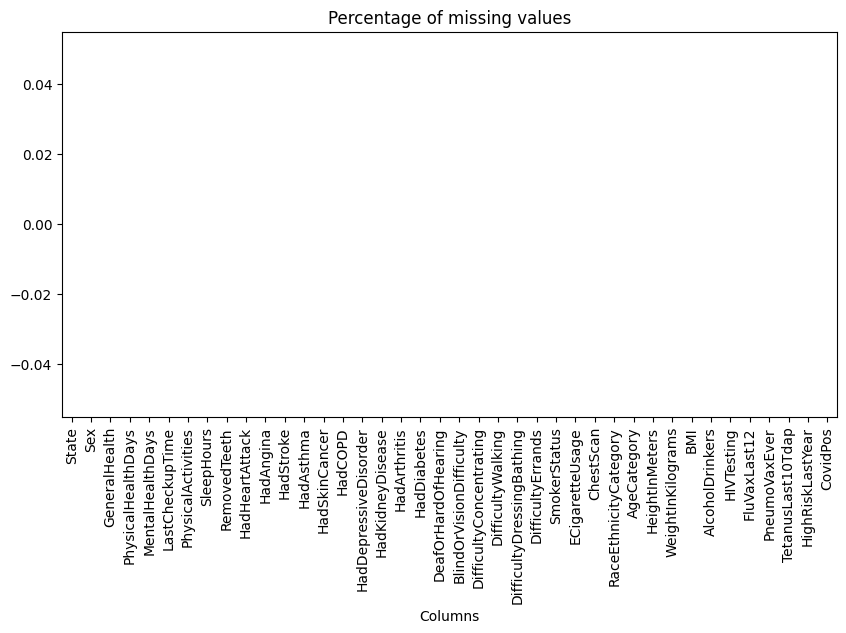

In [8]:
plt.figure(figsize=(10,5))
missing_precentage.plot(kind='bar',color='blue')
plt.xlabel('Columns')
plt.title('Percentage of missing values')
plt.show()

In [9]:
data.GeneralHealth.value_counts(normalize=True)*100

GeneralHealth
Very good    35.362285
Good         31.464259
Excellent    16.878572
Fair         12.461894
Poor          3.832991
Name: proportion, dtype: float64

In [10]:
data.GeneralHealth.fillna(data.GeneralHealth.mode()[0],inplace=True)

In [11]:
data.PhysicalHealthDays.value_counts(normalize=True)*100

PhysicalHealthDays
0.0     62.109080
30.0     6.974986
2.0      5.986456
1.0      4.088252
3.0      3.713896
5.0      3.633415
10.0     2.466446
7.0      2.122168
4.0      1.994131
15.0     1.969336
20.0     1.199080
14.0     1.143394
6.0      0.577591
25.0     0.456463
8.0      0.390615
12.0     0.247945
21.0     0.237377
28.0     0.148361
9.0      0.085765
29.0     0.072351
18.0     0.061377
16.0     0.051215
27.0     0.041866
17.0     0.041053
11.0     0.038614
13.0     0.035363
22.0     0.029266
26.0     0.026014
24.0     0.024388
23.0     0.021949
19.0     0.011788
Name: proportion, dtype: float64

In [12]:
data.PhysicalHealthDays.mean() - data.PhysicalHealthDays.std() * 3    #outliers

-21.098505519742908

In [13]:
data.PhysicalHealthDays.mean() + data.PhysicalHealthDays.std() * 3   #outliers

29.336557401281958

<Axes: ylabel='PhysicalHealthDays'>

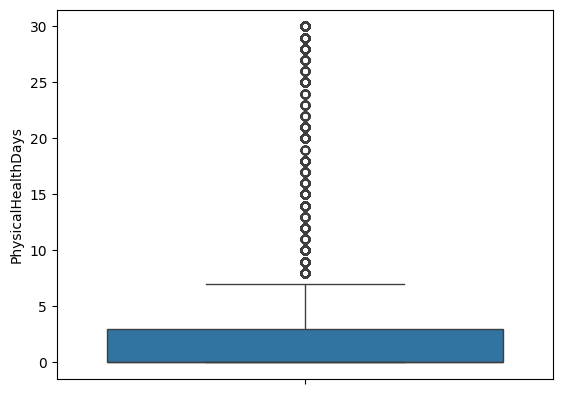

In [14]:
sns.boxplot(data.PhysicalHealthDays)

In [15]:
data.PhysicalHealthDays.fillna(data.PhysicalHealthDays.median(),inplace=True)

In [16]:
data.MentalHealthDays.value_counts(normalize=True)*100

MentalHealthDays
0.0     61.154693
2.0      5.613319
30.0     5.569421
5.0      4.724374
3.0      3.596833
10.0     3.589516
1.0      3.350920
15.0     3.276536
20.0     2.001853
4.0      1.856745
7.0      1.823008
25.0     0.669452
14.0     0.639374
6.0      0.538976
8.0      0.395493
12.0     0.290624
28.0     0.196730
21.0     0.122347
29.0     0.106088
18.0     0.067474
16.0     0.067067
9.0      0.058938
17.0     0.053654
27.0     0.045931
22.0     0.041053
13.0     0.039021
11.0     0.028046
24.0     0.027640
26.0     0.023982
23.0     0.020730
19.0     0.010162
Name: proportion, dtype: float64

In [17]:
data.MentalHealthDays.mean() - data.MentalHealthDays.std() * 3    #outliers

-20.14092184459384

In [18]:
data.MentalHealthDays.mean() + data.MentalHealthDays.std() * 3    #outliers

28.475200892809042

<Axes: ylabel='MentalHealthDays'>

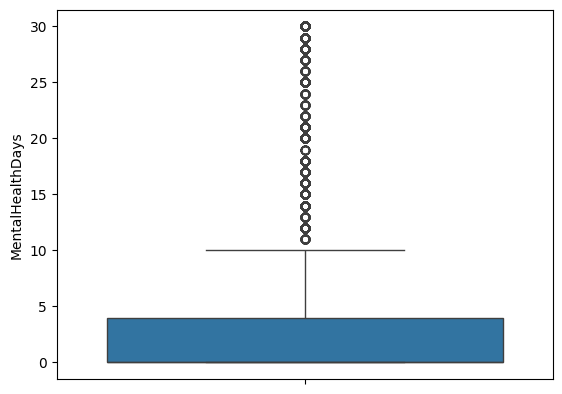

In [19]:
sns.boxplot(data.MentalHealthDays)

In [20]:
data.MentalHealthDays.fillna(data.MentalHealthDays.median(),inplace=True)

In [21]:
data.LastCheckupTime.value_counts(normalize=True)*100

LastCheckupTime
Within past year (anytime less than 12 months ago)         80.542797
Within past 2 years (1 year but less than 2 years ago)      9.441026
Within past 5 years (2 years but less than 5 years ago)     5.586492
5 or more years ago                                         4.429685
Name: proportion, dtype: float64

In [22]:
data.LastCheckupTime.fillna(data.LastCheckupTime.mode()[0],inplace=True)

In [23]:
data.PhysicalActivities.value_counts(normalize=True)*100

PhysicalActivities
Yes    77.76459
No     22.23541
Name: proportion, dtype: float64

In [24]:
data.groupby('AgeCategory')['PhysicalActivities'].value_counts(normalize=True)


AgeCategory      PhysicalActivities
Age 18 to 24     Yes                   0.857491
                 No                    0.142509
Age 25 to 29     Yes                   0.847241
                 No                    0.152759
Age 30 to 34     Yes                   0.836580
                 No                    0.163420
Age 35 to 39     Yes                   0.832906
                 No                    0.167094
Age 40 to 44     Yes                   0.814352
                 No                    0.185648
Age 45 to 49     Yes                   0.797171
                 No                    0.202829
Age 50 to 54     Yes                   0.776427
                 No                    0.223573
Age 55 to 59     Yes                   0.760394
                 No                    0.239606
Age 60 to 64     Yes                   0.761714
                 No                    0.238286
Age 65 to 69     Yes                   0.774311
                 No                    0.225689
Age 

In [25]:
data.PhysicalActivities.fillna(data.PhysicalActivities.mode()[0],inplace=True)

In [26]:
data.SleepHours.value_counts(normalize=True)*100

SleepHours
7.0     31.073237
8.0     28.423068
6.0     21.941534
5.0      6.672980
9.0      4.820301
4.0      2.633098
10.0     2.222565
3.0      0.657665
12.0     0.599946
2.0      0.300786
1.0      0.228841
11.0     0.137793
16.0     0.063002
15.0     0.062596
14.0     0.060157
18.0     0.033737
13.0     0.032111
20.0     0.020323
24.0     0.005284
17.0     0.004471
23.0     0.002439
19.0     0.002032
22.0     0.002032
Name: proportion, dtype: float64

<Axes: ylabel='SleepHours'>

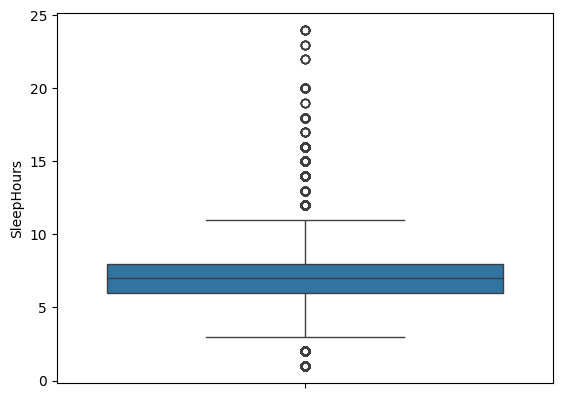

In [27]:
sns.boxplot(data.SleepHours)

In [28]:
data.SleepHours.fillna(data.SleepHours.median(), inplace=True)

In [29]:
data.RemovedTeeth.value_counts(normalize=True)*100

RemovedTeeth
None of them              53.487899
1 to 5                    30.363951
6 or more, but not all    10.547837
All                        5.600312
Name: proportion, dtype: float64

In [30]:
data.RemovedTeeth.fillna(data.RemovedTeeth.mode()[0],inplace=True)  

In [31]:
columns_to_fill=['HadHeartAttack','HadAngina','HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
    'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']
for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0],inplace=True)

In [32]:
disability_columns = [
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands'
]

for col in disability_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [33]:
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [34]:
data.SmokerStatus.value_counts(normalize=True) * 100

SmokerStatus
Never smoked                             60.050321
Former smoker                            27.854013
Current smoker - now smokes every day     8.803684
Current smoker - now smokes some days     3.291982
Name: proportion, dtype: float64

In [35]:
data.SmokerStatus.fillna(data.SmokerStatus.mode()[0], inplace=True)

In [36]:
data.ECigaretteUsage.value_counts(normalize=True) * 100

ECigaretteUsage
Never used e-cigarettes in my entire life    77.280894
Not at all (right now)                       17.592329
Use them some days                            2.706262
Use them every day                            2.420515
Name: proportion, dtype: float64

In [37]:
data.ECigaretteUsage.fillna(data.ECigaretteUsage.mode()[0], inplace=True)

In [38]:
data.AlcoholDrinkers.value_counts(normalize=True) * 100

AlcoholDrinkers
Yes    54.997927
No     45.002073
Name: proportion, dtype: float64

In [39]:
data.AlcoholDrinkers.fillna(data.AlcoholDrinkers.mode()[0], inplace=True)

In [40]:
data.HIVTesting.value_counts(normalize=True) * 100

HIVTesting
No     65.652665
Yes    34.347335
Name: proportion, dtype: float64

In [41]:
data.HIVTesting.fillna(data.HIVTesting.mode()[0], inplace=True)

<Axes: xlabel='HIVTesting'>

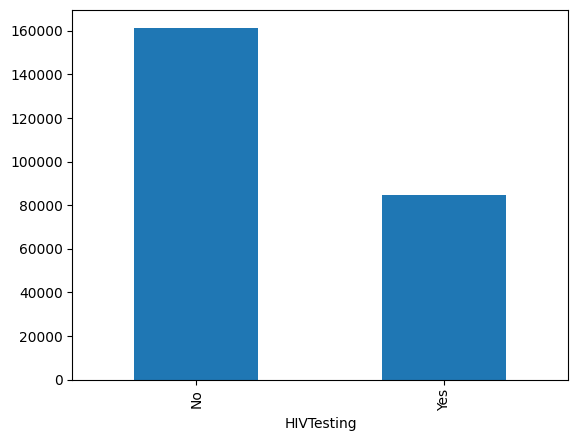

In [42]:
data.HIVTesting.value_counts().plot(kind='bar')

In [43]:
data.FluVaxLast12.value_counts(normalize=True) * 100

FluVaxLast12
Yes    53.326938
No     46.673062
Name: proportion, dtype: float64

<Axes: xlabel='FluVaxLast12'>

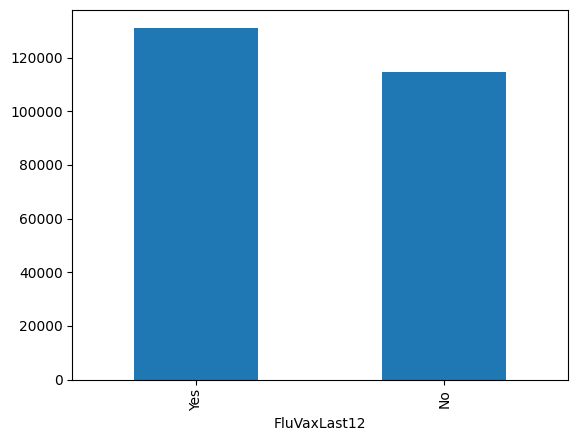

In [44]:
data.FluVaxLast12.value_counts().plot(kind='bar')